## NumPy索引切片玫瑰花操作

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
img = plt.imread("./rose.jpg")
img

array([[[246, 246, 246],
        [246, 246, 246],
        [246, 246, 246],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [246, 246, 246]],

       [[246, 246, 246],
        [246, 246, 246],
        [246, 246, 246],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [246, 246, 246]],

       [[246, 246, 246],
        [246, 246, 246],
        [246, 246, 246],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [246, 246, 246]],

       ...,

       [[246, 246, 246],
        [246, 246, 246],
        [246, 246, 246],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [246, 246, 246]],

       [[246, 246, 246],
        [246, 246, 246],
        [246, 246, 246],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [246, 246, 246]],

       [[246, 246, 246],
        [246, 246, 246],
        [246, 246, 246],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [246, 246, 246]]

In [8]:
img.shape
# 615：高度像素
# 650：宽度像素
# 3：颜色通道 RGB

(615, 650, 3)

In [4]:
img.ndim

3

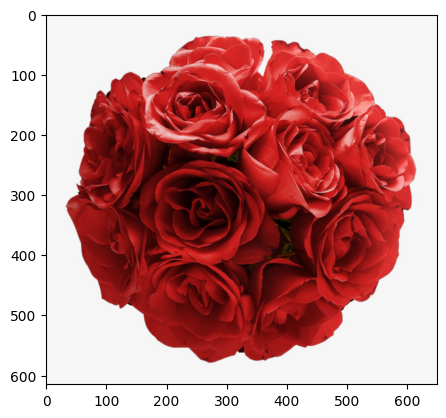

In [5]:
plt.imshow(img)

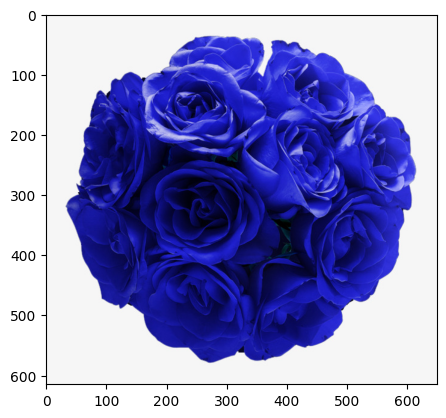

In [7]:
# 将图像的红色和蓝色通道上的数据互换
plt.imshow(img[:,:,::-1])

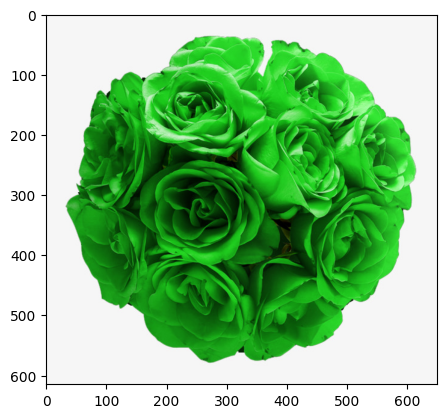

In [10]:
# 将图像的红色和绿色通道上的数据互换
plt.imshow(img[:,:,[1,0,2]])  # [1,0,2] 花式索引

## pandas

### 数据结构
一维结构

In [23]:
import pandas as pd

print("指定索引：")
s = pd.Series(data=[0,3,4,7], index = ['a','b','c','d'])
print(s)

# 一维Series与之前的NumPy的不同点？ 区别在于索引，一一对应
s = pd.Series(data=[0,3,4,7]) # 
print("不指定索引，使用默认索引：")
print(s)

指定索引：
a    0
b    3
c    4
d    7
dtype: int64
不指定索引，使用默认索引：
0    0
1    3
2    4
3    7
dtype: int64


二维结构

In [33]:
import pandas as pd
import numpy as np

# 类似 Excel
pd.DataFrame(data=np.random.randint(0,150,size = (5,3)),
             columns=['Python','En','Math'],
             index=list('ABCDE'),
             dtype=np.float32)


,Python,En,Math
A,138.0,7.0,40.0
B,20.0,100.0,42.0
C,26.0,110.0,21.0
D,68.0,28.0,135.0
E,99.0,35.0,110.0


In [38]:
import pandas as pd
import numpy as np

# 创建DataFrame的第二种方式：字典中的key作为列索引，values作为列数据
df = pd.DataFrame(data={'Python':np.random.randint(100,150,size=5),
                     'En':np.random.randint(0,150,size=5),
                     'Math':np.random.randint(0,150,size=5)},
             index=list('ABCED'))
df

,Python,En,Math
A,101,51,147
B,111,42,54
C,109,140,107
E,121,83,75
D,136,78,148


In [39]:
# 按 index 降序排序
df.sort_index(ascending=False)

,Python,En,Math
E,121,83,75
D,136,78,148
C,109,140,107
B,111,42,54
A,101,51,147


### 数据查看

In [61]:
import numpy as np
import pandas as pd
# 创建 shape(150,3)的二维标签数组结构DataFrame
df = pd.DataFrame(data = np.random.randint(0,151,size = (150,3)),
                   index = None,# 行索引默认
                   columns=['Python','Math','En'])# 列索引

df['Python'] = df['Python'].astype(np.int64)  # 改变Python列的数据类型

# 查看其属性、概览和统计信息
df.head(10) # 显示头部10行，默认5个
df.tail(10) # 显示末尾10行，默认5个
df.shape # 查看形状，行数和列数
df.dtypes # 查看数据类型
df.index # 行索引
df.columns # 列索引
df.values # 对象值，二维ndarray数组
df.describe() # 查看数值型列的汇总统计,计数、平均值、标准差、最小值、四分位数、最大值
df.info() # 查看列索引、数据类型、非空计数和内存信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Python  150 non-null    int64
 1   Math    150 non-null    int32
 2   En      150 non-null    int32
dtypes: int32(2), int64(1)
memory usage: 2.5 KB


In [60]:
df

,Python,Math,En
0,69,62,48
1,55,145,38
2,3,62,150
3,77,81,140
4,122,27,78
...,...,...,...
145,121,6,90
146,127,150,80
147,109,59,136
148,54,50,100


### 数据的输入和输出

In [69]:
import numpy as np
import pandas as pd

df = pd.DataFrame(data=np.random.randint(0,50,size = [5,5]), 
                  columns=['IT','化工','生物','教师','士兵'],
                  index=list('ABCDE'))  # 薪资情况
display(df)

# 保存到当前路径下，文件命名是：salary.csv。csv逗号分割值文件格式
df.to_csv('./salary.csv',
          sep = ',', # 文本分隔符，默认是逗号
          header = True,# 是否保存列索引
          index = True) # 是否保存行索引，保存行索引，文件被加载时，默认行索引会作为一列

,IT,化工,生物,教师,士兵
A,48,29,5,25,48
B,3,43,19,14,37
C,26,30,28,4,3
D,35,4,46,48,0
E,39,20,21,44,6


In [75]:
# 加载
pd.read_csv('./salary.csv',
            sep = ',', # 默认是逗号
            header = [0], #指定列索引
            index_col=0)  # 指定行索引

,IT,化工,生物,教师,士兵
A,48,29,5,25,48
B,3,43,19,14,37
C,26,30,28,4,3
D,35,4,46,48,0
E,39,20,21,44,6


In [93]:
import numpy as np
import pandas as pd

df1 = pd.DataFrame(data = np.random.randint(0,50,size = [50,5]),
               columns=['IT','化工','生物','教师','士兵']) # 薪资情况

df2 = pd.DataFrame(data = np.random.randint(0,50,size = [150,3]),
                   columns=['Python','Tensorflow','Keras'])# 计算机科目的考试成绩

# 保存位 Excel 文件
# 保存到当前路径下，文件命名是：salary.xlsx
df1.to_excel('./salary.xlsx',
            sheet_name = 'salary',# Excel中工作表的名字
            header = True,# 是否保存列索引
            index = False) # 是否保存行索引，保存行索引

向一个Excel文件中插入多个表

In [96]:
# 一个Excel文件中保存多个工作表
with pd.ExcelWriter('./data.xlsx') as writer:
    df1.to_excel(writer,sheet_name='salary',index = False)
    df2.to_excel(writer,sheet_name='score',index = False)

pd.read_excel('./data.xlsx',
              sheet_name='score') # 读取Excel中指定名字的工作表 

,Python,Tensorflow,Keras
0,8,12,14
1,42,34,35
2,2,10,20
3,48,32,11
4,49,17,0
...,...,...,...
145,33,6,44
146,42,3,28
147,11,42,37
148,20,0,49


In [97]:
pd.read_excel('./salary.xlsx',
              sheet_name=0,  # 读取哪一个Excel中工作表，默认第一个
              header = 0,  # 使用第一行数据作为列索引
              names = list('ABCDE'),  # 替换列索引
              index_col=1  # 指定行索引，B列数据作为行索引
             )

,A,C,D,E
B,,,,
40,32,32,35,23
30,2,49,0,45
13,36,34,39,32
6,43,29,16,39
43,24,1,40,32
29,20,18,36,41
26,26,39,45,9
15,11,6,28,47
34,37,33,47,47


### 数据选择

In [98]:
# 和 NumPy的花式索引类似

In [100]:
df = pd.DataFrame(np.random.randint(0,150,size=(1000,3)),
                 columns=['Python','En','Math'])
df

,Python,En,Math
0,36,48,79
1,103,69,149
2,123,145,64
3,88,4,149
4,81,7,94
...,...,...,...
995,130,5,113
996,105,32,104
997,122,129,8
998,144,7,77


#### 烈获取

In [101]:
# 获取指定列
df['Python']  # Series

0       36
1      103
2      123
3       88
4       81
      ... 
995    130
996    105
997    122
998    144
999    138
Name: Python, Length: 1000, dtype: int32

In [102]:
df.Python

0       36
1      103
2      123
3       88
4       81
      ... 
995    130
996    105
997    122
998    144
999    138
Name: Python, Length: 1000, dtype: int32

In [104]:
# 获取多列
df[['Python','Math']]  # pd.DataFrame

,Python,Math
0,36,79
1,103,149
2,123,64
3,88,149
4,81,94
...,...,...
995,130,113
996,105,104
997,122,8
998,144,77


#### 行获取

In [105]:
df2 = pd.DataFrame(np.random.randint(0,150,size=(5,3)),\
                  index=list('ABCDE'),
                  columns=['Python','Math','En'])
df2

,Python,Math,En
A,135,99,58
B,105,88,143
C,35,101,101
D,125,1,25
E,43,56,69


In [109]:
# 获取指定行
df2.loc['A']  # Series

Python    135
Math       99
En         58
Name: A, dtype: int32

In [111]:
# 获取多行
df2.loc[['A','D']]  # pd.DataFrame

,Python,Math,En
A,135,99,58
D,125,1,25


In [113]:
# iloc 通过自然数索引（0 ~ n） 来获取数据
df2.iloc[0]

Python    135
Math       99
En         58
Name: A, dtype: int32

In [114]:
df2.iloc[[0,3]]

,Python,Math,En
A,135,99,58
D,125,1,25


#### 具体数值获取

In [124]:
df2['Math']['B']  #  df2 后面直接加 [] 只支持列索引
# df2['Math', 'B'] # 不支持这种写法，报错

88

In [116]:
# loc 表示先过去行，再获取列
df2.loc['B']['Math']

88

In [117]:
df2.loc['B','Math']

88

In [119]:
df2.iloc[1][1]

88

In [121]:
df2.iloc[1,1]

88

In [125]:
# 切片
df2.loc['A':'C']

,Python,Math,En
A,135,99,58
B,105,88,143
C,35,101,101


In [126]:
df2.loc['A':'C', 'Math':]

,Math,En
A,99,58
B,88,143
C,101,101


In [127]:
df2.iloc[2:4,[0,-1]]

,Python,En
C,35,101
D,125,25


#### boolean索引

In [128]:
df

,Python,En,Math
0,36,48,79
1,103,69,149
2,123,145,64
3,88,4,149
4,81,7,94
...,...,...,...
995,130,5,113
996,105,32,104
997,122,129,8
998,144,7,77


In [131]:
# 获取 Python 成绩为 149 的数据
cond = df['Python'] == 149
df[cond]

,Python,En,Math
165,149,129,19
238,149,85,141
333,149,137,112
380,149,140,29
557,149,45,110
872,149,54,22


In [132]:
cond1 = df['Python'] > 130
cond2 = df['Math'] > 130
cond = cond1 & cond2
df[cond]

,Python,En,Math
32,139,137,136
158,137,93,147
173,131,9,133
238,149,85,141
294,145,75,138
367,135,103,149
414,147,122,132
453,140,87,138
577,142,4,149
610,143,132,137
